# External Modules
Modules, like functions are simply pre-written code fragments that perform a certain task. In older procedural languages modules and subroutines are similar concepts.

An external module, is just a file that contains python code, that is imported into your script, then run as if it was part of the script all along. Consider the following code cells - and read the comments

In [6]:
! ls -l # list contents of current directory

total 716
-rw-rw-r-- 1 sensei sensei 122771 Jul 22 14:27 base-functions.png
-rw-rw-r-- 1 sensei sensei 194845 Jul 22 14:27 external-file-import-Copy1.png
-rw-rw-r-- 1 sensei sensei 194845 Jul 22 14:27 external-file-import.png
-rw-rw-r-- 1 sensei sensei  72197 Jul 22 14:31 externalmodules.ipynb
-rw-rw-r-- 1 sensei sensei 113349 Jul 22 14:27 flow-control-diagram.png
-rw-rw-r-- 1 sensei sensei  17790 Jul 22 14:27 functions.md
-rw-rw-r-- 1 sensei sensei   4066 Jul 22 14:27 index.html
-rw-rw-r-- 1 sensei sensei    174 Jul 22 14:27 mylibrary.py


In [7]:
! cat mylibrary.py # list contents of file named mylibrary.py

def neko(input_argument) :
     import math #ok to import into a function
     local_variable = input_argument * math.sqrt(abs(1.0+input_argument))
     return local_variable

In [8]:
import mylibrary # iPython assumes the extension .py
# wrapper to run the neko function
yes = 0
while yes == 0:
    xvalue = input('enter a numeric value')
    try:
        xvalue = float(xvalue)
        yes = 1
    except:
        print('enter a bloody number! Try again \n')
# call the function, get value , write output
yvalue = mylibrary.neko(xvalue) # here we call out external function
print('f(',xvalue,') = ',yvalue) # and we are done 

enter a numeric value 2


f( 2.0 ) =  3.4641016151377544


In JupyterHub environments, you may discover that changes you make to your external python file are not reflected when you re-run your script; you need to restart the kernel to get the changes to actually update. The figure below depicts the notebook, external file relatonship

![](external-file-import.png)


This relationship is levereged when we build oor own libraries as illustrated next.

---


## Saving Code as a Separate Module/File

Above we imported the `neko()` function.

Here we will create a new function, export it to a file, so we can reuse it in later notebooks without having to retype or cut-and-paste. The `dusty()` function evaluates:

$$f(x) = x\sqrt{|(1 + x)|}$$

Its the same as the `neko()` function.

1. Create a text file named "mydusty.txt"
2. Copy the `dusty()` function script below into that file.

        def dusty(input_argument) :
            import math #ok to import into a function
            local_variable = input_argument * math.sqrt(abs(1.0+input_argument))
            return local_variable

**Note: the cells below we build the file directly on the server using bash (shell) commands; you would simply open the file in an editor and type the lines above. In lecture/lab we will use an editor to make the file**

4. rename `mydusty.txt` to `mydusty.py`  (This is a bit unnecessary, but if your editor gats confused, make a .txt file then rename after populated)
5. modify the wrapper script to use the dusty function as an external module

In [32]:
! touch mydusty.txt # bash call to create an empty text file

In [33]:
# bash calls to populate the file, you would normally use a text editor to create the file
! echo 'def dusty(input_argument) : ' > line1.txt
! echo '    import math #ok to import into a function'  > line2.txt
! echo '    local_variable = input_argument * math.sqrt(abs(1.0+input_argument))' > line3.txt
! echo '    return local_variable' > line4.txt
! cat line1.txt line2.txt line3.txt line4.txt > mydusty.txt # build mydusty
! rm -f line*.txt # remove the temp files
! mv mydusty.txt mydusty.py # rename the populated file

In [34]:
# wrapper to run the dusty function
import mydusty
yes = 0
while yes == 0:
    xvalue = input('enter a numeric value')
    try:
        xvalue = float(xvalue)
        yes = 1
    except:
        print('enter a bloody number! Try again \n')
# call the function, get value , write output
yvalue = mydusty.dusty(xvalue)
print('f(',xvalue,') = ',yvalue) # and we are done 

enter a numeric value 2


f( 2.0 ) =  3.4641016151377544


---

## Temperature Converter Example (Repeated)

Create a Fahrenhiet to Celsius converter and test it for these values:

- 32
- 15
- 100

*hint: Formula-(°F − 32) × 5/9 = °C

### Problem Solving Process

#### Step 1
Define the problem (problem statement):
- Create a tool to convert Fahrenhiet to Celsius

#### Step 2
Gather information (identify known and unknown values, and governing equations)
- Known: Input in F
- Unknown: Output in C
- Governing Principles: *Formula: (°F − 32) × 5/9 = °C*

#### Step 3
Generate and evaluate potential solutions
- -40F = -40C
- 32F = 0C
- 212F = 100C

#### Step 4
Refine and implement a solution
1. Create function to evaluate input and produce output

In [9]:
def FC(x) : # convert F to C
    C = (x - 32)*5/9
    return C

2. Create wrapper to prompt for input, execute function, label output

In [10]:
print(FC(99))

37.22222222222222


#### Step 5
Verify and test the solution.

In [11]:
print(FC(-40))

-40.0


In [12]:
print(FC(32))

0.0


In [13]:
print(FC(212))

100.0


#### Step 6
Refine to be useful
- Modify the wrapper to be interactive

In [56]:
def F2C(x) : # convert F to C
    C = (x - 32)*5/9
    return C
# wrapper to run the F2C function
yes = 0
while yes == 0:
    xvalue = input('Enter a temperature in Fairyheight')
    try:
        xvalue = float(xvalue)
        yes = 1
    except:
        print('Enter a bloody number! Try again \n')
# call the function, get value , write output
yvalue = F2C(xvalue)
print('Temp: ',xvalue,'F = ',yvalue,' C') # and we are done 

Enter a temperature in Fairyheight -40


Temp:  -40.0 F =  -40.0  C



- Save the function into an external module "myConversions.py"



In [35]:
# bash calls to populate the file, you would normally use a text editor to create the file
! echo 'def F2C(x) : # convert F to C' > line1.txt
! echo '    C = (x - 32)*5/9'          > line2.txt
! echo '    return C'                  > line3.txt
! cat line1.txt line2.txt line3.txt    > myConversions.py # build "myConversions.py"
! rm -f line*.txt # remove the temp files

In [41]:
! cat myConversions.py # list contents of the file

def F2C(x) : # convert F to C
    C = (x - 32)*5/9
    return C


In [40]:
import myConversions
# wrapper to run the F2C function
yes = 0
while yes == 0:
    xvalue = input('Enter a temperature in Fairyheight')
    try:
        xvalue = float(xvalue)
        yes = 1
    except:
        print('Enter a bloody number! Try again \n')
# call the function, get value , write output
yvalue = myConversions.F2C(xvalue)
print('Temp: ',xvalue,'F = ',yvalue,' C') # and we are done 

Enter a temperature in Fairyheight -40


Temp:  -40.0 F =  -40.0  C


## Rudimentary Graphics

We can use external modules and function to make things other than strings and numbers for example consider making a script to that draws a straight line between two points and presents it as a plot.

The external module is named `matplotlib.pyplot` and is imported in the function body, then we prompt for vertex locations `(x1,y1)` and `(x2,y2)` then draw the plot.  Notice a null return statement which will return control to the main program.

In [54]:
def drawAline():
    import matplotlib.pyplot  # import the plotting library from matplotlib
    x1 = int(input('Please enter x value for point 1'))
    y1 = int(input('Please enter y value for point 1'))
    x2 = int(input('Please enter x value for point 2'))
    y2 = int(input('Please enter y value for point 2'))
    xlist = [x1,x2]
    ylist = [y1,y2]
    matplotlib.pyplot.plot(xlist, ylist, color ='orange', marker ='*', linestyle ='solid') 
    #matplotlib.pyplot.title(strtitle)# add a title
    matplotlib.pyplot.ylabel("Y-axis")# add a label to the x and y-axes
    matplotlib.pyplot.xlabel("X-axis")
    matplotlib.pyplot.show() # display the plot
    return #null return

Please enter x value for point 1 1
Please enter y value for point 1 1
Please enter x value for point 2 2
Please enter y value for point 2 2


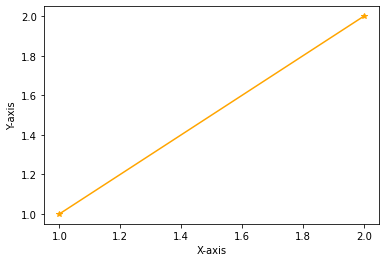

In [55]:
drawAline()

Now lets put the plotting script into a function so we can make line charts of any two numeric lists

## References

1. Grus, Joel (2015-04-14). Data Science from Scratch: First Principles with Python
(Kindle Locations 1190-1191). O'Reilly Media. Kindle Edition. 

2. Call Expressions in "Adhikari, A. and DeNero, J. Computational and Inferential Thinking The Foundations of Data Science" https://www.inferentialthinking.com/chapters/03/3/Calls.html

3. Functions and Tables in "Adhikari, A. and DeNero, J. Computational and Inferential Thinking The Foundations of Data Science" https://www.inferentialthinking.com/chapters/08/Functions_and_Tables.html

4. Visualization in "Adhikari, A. and DeNero, J. Computational and Inferential Thinking The Foundations of Data Science" https://www.inferentialthinking.com/chapters/07/Visualization.html

5. Documentation; The Python Standard Library; 9. Numeric and Mathematical Modules https://docs.python.org/2/library/math.html
